# Biological interpretation of clusters in training set using multinomial logistic regression

In [1]:
#load relevant packages 
import numpy as np
import pandas as pd
import sys
import sklearn
import pyreadr
import itertools

import matplotlib as mpl
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from numpy import random
import seaborn as sb
from scipy import linalg

In [2]:
#loads data
training = pd.read_csv('training_clustered_new.csv')

In [3]:
training.columns

Index(['eid', 'WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume',
       'Smoke_status', 'Ethnicity', 'Alcohol_status', 'BMI',
       'Smoke_pack_years', 'date_diagnosis', 'date_death', 'time_to_diagnosis',
       'Sex', 'deprivation_score', 'Age_recr', 'case_status', 'type',
       'year_diagnosis', 'days_since_diagnosis', 'cluster'],
      dtype='object')

In [5]:
training['cluster'].value_counts()

3    6065
2    4502
1    2506
5    1911
0     548
4      36
Name: cluster, dtype: int64

In [6]:
grouped = training.groupby('cluster')['nucleated_rbc_count']
summary_stats = grouped.agg(['mean', 'median', 'std'])

print(summary_stats)

             mean  median       std
cluster                            
0        0.000000     0.0  0.000000
1        0.000000     0.0  0.000000
2        0.000000     0.0  0.000000
3        0.000000     0.0  0.000000
4        0.094722     0.1  0.010552
5        0.000000     0.0  0.000000


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15563    0.0
15564    0.0
15565    0.0
15566    0.0
15567    0.0
Name: nucleated_rbc_count, Length: 15568, dtype: float64

In [5]:
#creates new dataframe, converting appropriate variables to dummies
df_logistic = pd.get_dummies(training, columns=['Smoke_status', 'Ethnicity','Alcohol_status','type'], drop_first=True)

In [6]:
df_logistic.columns

Index(['eid', 'WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years', 'date_diagnosis', 'date_death', 'time_to_diagnosis',
       'Sex', 'deprivation_score', 'Age_recr', 'case_status', 'year_diagnosis',
       'days_since_diagnosis', 'cluster', 'Smoke_status_2', 'Smoke_status_3',
       'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Alcohol_status_2',
       'Alcohol_status_3', 'type_Leukaemia', 'type_Lymphoma',
       'type_Myelodysplastic_syndromes', 'type_Myelofibrosis', 'type_Myeloma',
       'type_None', 'type_Polycythaemia_vera', 'type_Thrombocythaemia'],
      dtype='object')

In [39]:
(df_logistic['Smoke_status_2'] == 1).sum()


7919

In [6]:
#creates predictor dataframe with all variables except cluster column
X_train = df_logistic.loc[:,['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years','Sex', 'deprivation_score', 'Age_recr','case_status','Smoke_status_2', 'Smoke_status_3',
       'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Alcohol_status_2',
       'Alcohol_status_3']]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#creates y dataframe with cluster membership as outcome
y_train = df_logistic['cluster']

In [6]:
df_logistic.iloc[:,1:13].columns

Index(['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume'],
      dtype='object')

In [7]:
#creates predictor dataframe with blood counts only
X_train_blood = df_logistic.iloc[:,1:13]
X_train_blood.columns

Index(['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume'],
      dtype='object')

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)


Let's first perform logistic regression with the default settings to see what the baseline model can do

In [8]:
from sklearn.linear_model import LogisticRegression

In [39]:
test_logistic.shape

(59820, 34)

In [8]:
#baseline_logmodel = LogisticRegression(multi_class='multinomial')

In [ ]:
# report the model performance using f1 score

from sklearn.metrics import make_scorer, f1_score
# Create a scoring metric for F1 score with weighted averaging
f1_scorer = make_scorer(f1_score, average='weighted')
# Fit and evaluate the model using cross-validation
f1_scores = cross_val_score(baseline_logmodel, X_train, y_train, scoring=f1_scorer, cv=cv, n_jobs=-1)

f1_scores

The baseline model performs quite well, can we optimise it further?

# Optimising the logistic regression model to predict cluster membership

In [ ]:
from sklearn.model_selection import GridSearchCV

#THIS TAKES AGES TO RUN AND GIVES A LOT OF WARNINGS!!!!
# Define the parameter grid
#lib linear cannot do multinomial 
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'max_iter': [100, 500, 1000,4000],
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]
             }

# Create a GridSearchCV object with the logistic regression model and the parameter grid
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial'),
                           param_grid, cv=cv, n_jobs=-1, scoring='f1_weighted')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the associated mean test score
print('Best hyperparameters:', grid_search.best_params_)
print('Best test score:', grid_search.best_score_)

In [9]:
#creates model with optimum parameters

optimum_logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000,penalty='none')

In [10]:
log_all = optimum_logmodel.fit(X_train,y_train)

/rds/general/user/jt1019/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [11]:
optimum_logmodel_blood = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000,penalty='none')

In [12]:
log_blood = optimum_logmodel_blood.fit(X_train_blood,y_train)

/rds/general/user/jt1019/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/rds/general/user/jt1019/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Compute the AIC for the first model
n_samples, n_features = X_train.shape
k1 = n_features + log_all.intercept_.shape[0] * (n_features + 1) # number of parameters
ll1 = log_all.score(X_train, y_train) * n_samples # log-likelihood
aic_1 = 2 * k1 - 2 * ll1

# Compute the AIC for the second model
n_samples2, n_features2 = X_train_blood.shape
k2 = n_features2 + log_blood.intercept_.shape[0] * (n_features2 + 1) # number of parameters
ll2 = log_blood.score(X_train_blood, y_train) * n_samples2 # log-likelihood
aic_2 = 2 * k2 - 2 * ll2

print(aic_1)
print(aic_2)

-28036.0
-16546.0


In [13]:
# Create a new DataFrame with the same column names as X_train
X_train_df = pd.DataFrame(X_train, columns=df_logistic.loc[:,['WBC_count', 'red_blood_cell_count', 'haemoglobin_conc',
       'platelet_count', 'lymphocyte_count', 'monocyte_count',
       'neutrophil_count', 'eosinophil_count', 'basophil_count',
       'nucleated_rbc_count', 'reticulocyte_count', 'mean_cell_volume', 'BMI',
       'Smoke_pack_years','Sex', 'deprivation_score', 'Age_recr','case_status','Smoke_status_2', 'Smoke_status_3',
       'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Alcohol_status_2',
       'Alcohol_status_3']].columns)

In [14]:
# Create a new DataFrame with the same column names as X_train
X_train_blood_df = pd.DataFrame(X_train_blood, columns=df_logistic.iloc[:,1:13].columns)

In [50]:
X_train_blood_df.shape

(15568, 12)

In [15]:
# Create the coefs DataFrame
coefs = pd.DataFrame(optimum_logmodel.coef_, columns=X_train_df.columns)

In [14]:
coefs.shape

(6, 25)

In [16]:
#creates coefs dataframe for blood data
coefs_blood = pd.DataFrame(optimum_logmodel_blood.coef_, columns=X_train_blood_df.columns)

In [16]:
#displays all columns in coefs
pd.set_option('display.max_columns', None)
coefs

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,reticulocyte_count,mean_cell_volume,BMI,Smoke_pack_years,Sex,deprivation_score,Age_recr,case_status,Smoke_status_2,Smoke_status_3,Ethnicity_2,Ethnicity_3,Ethnicity_4,Alcohol_status_2,Alcohol_status_3
0,-29.126261,0.954233,-1.091231,0.060613,12.458906,3.262426,23.355271,1.114616,41.254333,-2.451850,0.251966,0.238758,-0.224082,-0.037977,-0.011482,0.038465,0.333987,-0.101011,1.112479,0.937580,-0.115560,-0.006525,0.080373,-0.223124,0.009787
1,2.783216,0.474698,-0.475407,-0.012322,0.392762,-0.354877,-1.376046,-1.645599,40.034611,-2.289992,0.164750,0.126113,-0.296036,-0.000188,-0.104453,-0.011528,0.337842,-0.112518,1.157549,0.988121,-0.125556,0.038866,0.035204,-0.182148,0.004306
2,27.206055,-3.093683,3.113059,0.676605,-10.897912,-4.514245,-19.771791,-0.559905,-153.178772,3.051734,-1.298329,-0.676749,1.374266,0.044028,0.102094,0.111145,-0.831534,0.356796,-4.196620,-3.858419,0.747317,-0.579944,-0.248347,0.497088,-0.052314
3,-10.419916,0.434889,-0.491999,-0.005676,4.180088,1.567245,7.979031,0.088964,35.053967,-4.322867,0.253208,-0.001062,-0.239574,-0.018210,-0.111896,-0.044051,0.256177,-0.215658,1.048467,0.899510,-0.152947,0.063842,0.038837,-0.105244,0.035310
4,-1.879950,0.338550,0.337305,-0.715121,-1.508620,-1.190668,-1.458878,-0.918951,0.254130,8.830258,-0.016140,0.146617,-0.282504,-0.020631,0.338986,-0.137368,-0.333627,0.127807,-0.180606,0.128161,-0.153816,0.364634,0.034186,0.084235,-0.042351
5,11.436855,0.891313,-1.391727,-0.004097,-4.625224,1.230118,-8.727587,1.920875,36.581732,-2.817283,0.644545,0.166323,-0.332069,0.032977,-0.213249,0.043337,0.237155,-0.055415,1.058733,0.905046,-0.199439,0.119128,0.059747,-0.070807,0.045262


In [17]:
#displays all columns in coefs
pd.set_option('display.max_columns', None)
coefs_blood

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,reticulocyte_count,mean_cell_volume
0,0.332107,0.074810,-0.236543,0.003498,-0.222561,0.192853,-0.136135,0.195926,1.806180,-0.003597,-0.013845,0.006192
1,0.002397,-0.267076,-0.026271,0.001105,1.126754,-1.802387,0.319480,-3.799160,4.817412,-0.013465,-0.280783,0.006527
2,-1.171946,0.092775,-0.001568,0.003833,0.979555,-0.797789,1.208550,-0.806366,-6.427586,-0.053366,0.017498,0.026731
3,-1.867837,-0.615145,0.302170,0.002133,1.483307,0.587741,1.812544,-3.165442,-0.597350,-0.097146,0.067276,0.016253
4,-0.408019,0.424603,0.298186,-0.011012,-0.122752,-0.053907,-0.200744,-0.023400,-0.019746,0.178372,0.002500,-0.042258
5,3.113299,0.290033,-0.335975,0.000444,-3.244304,1.873489,-3.003695,7.598442,0.421089,-0.010798,0.207354,-0.013446


In [59]:
df_logistic['cluster'].value_counts()

3    6065
2    4502
1    2506
5    1911
0     548
4      36
Name: cluster, dtype: int64

In [17]:
# retrieve original column names
original_columns = coefs.columns[coefs.columns.isin(coefs.columns)]

In [18]:
#convert log odds coefficients to odds coefficients
coefs2 = coefs.applymap(np.exp)
#convert log odds coefficients to odds coefficients
coefs_blood2 = coefs_blood.applymap(np.exp)

In [20]:
#plots B odds coefficients from model containing all variables and covariates (except type and case status)
pd.set_option('display.max_columns',None)
coefs2

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,reticulocyte_count,mean_cell_volume,BMI,Smoke_pack_years,Sex,deprivation_score,Age_recr,case_status,Smoke_status_2,Smoke_status_3,Ethnicity_2,Ethnicity_3,Ethnicity_4,Alcohol_status_2,Alcohol_status_3
0,2.241949e-13,2.596678,0.335803,1.062487,257533.648598,26.112811,1.390161e+10,3.048399,8.251428e+17,0.086134,1.286552,1.269671,0.799249,0.962735,0.988583,1.039215,1.396525,0.903923,3.041889,2.553794,0.890867,0.993496,1.083691,0.800015,1.009835
1,1.617094e+01,1.607529,0.621632,0.987753,1.481066,0.701260,2.525753e-01,0.192897,2.436747e+17,0.101267,1.179098,1.134410,0.743761,0.999812,0.900817,0.988538,1.401919,0.893581,3.182123,2.686182,0.882007,1.039631,1.035831,0.833478,1.004315
2,6.537921e+11,0.045335,22.489744,1.967187,0.000018,0.010952,2.589525e-09,0.571263,2.987476e-67,21.151993,0.272988,0.508267,3.952175,1.045012,1.107487,1.117556,0.435381,1.428744,0.015046,0.021101,2.111328,0.559930,0.780089,1.643928,0.949030
3,2.983240e-05,1.544792,0.611403,0.994340,65.371633,4.793423,2.919102e+03,1.093041,1.673958e+15,0.013262,1.288151,0.998938,0.786963,0.981955,0.894138,0.956905,1.291981,0.806011,2.853273,2.458399,0.858175,1.065924,1.039601,0.900105,1.035941
4,1.525977e-01,1.402912,1.401166,0.489133,0.221215,0.304018,2.324970e-01,0.398937,1.289339e+00,6838.048282,0.983989,1.157911,0.753894,0.979581,1.403523,0.871649,0.716321,1.136334,0.834764,1.136736,0.857430,1.439986,1.034777,1.087884,0.958533
5,9.267511e+04,2.438328,0.248646,0.995911,0.009801,3.421634,1.620530e-04,6.826928,7.713371e+15,0.059768,1.905119,1.180954,0.717438,1.033527,0.807955,1.044290,1.267638,0.946092,2.882715,2.472046,0.819190,1.126514,1.061568,0.931642,1.046302


In [45]:
#plots B odds coefficients from model containing just blood cell count data
pd.set_option('display.max_columns',None)
coefs_blood2

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,reticulocyte_count,mean_cell_volume
0,1.393902,1.077680,0.789352,1.003504,0.800466,1.212704,0.872725,1.216437,6.087153,0.996409,0.986250,1.006211
1,1.002400,0.765615,0.974071,1.001106,3.085625,0.164905,1.376411,0.022390,123.644733,0.986625,0.755192,1.006549
2,0.309764,1.097215,0.998433,1.003840,2.663272,0.450323,3.348626,0.446478,0.001616,0.948033,1.017652,1.027092
3,0.154457,0.540562,1.352792,1.002135,4.407499,1.799918,6.126015,0.042196,0.550268,0.907423,1.069590,1.016386
4,0.664966,1.528983,1.347413,0.989048,0.884483,0.947520,0.818122,0.976872,0.980448,1.195270,1.002503,0.958623
5,22.495124,1.336472,0.714641,1.000444,0.038996,6.510977,0.049603,1995.084765,1.523621,0.989260,1.230418,0.986644


In [ ]:
summary = training.groupby('cluster').describe()

# Print the summary statistics
print(summary)

# Visualisations 

In [19]:
# replace the old cluster labels with the new labels
training['cluster'] = training['cluster'].replace({0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6})


In [20]:
training['cluster'].value_counts()

4    6065
3    4502
2    2506
6    1911
1     548
5      36
Name: cluster, dtype: int64

In [20]:
training_plots = training
# create a dictionary to map old column names to new column names
column_mapping = {
    'WBC_count': 'WBC count (x10^9/L)',
    'red_blood_cell_count': 'RBC count (x10^12/L)',
    'haemoglobin_conc': 'Haemoglobin concentration (g/dL)',
    'platelet_count': 'Platelet count (x10^9/L)',
    'lymphocyte_count': 'Lymphocyte count (x10^9/L)',
    'monocyte_count': 'Monocyte count (x10^9/L)',
    'neutrophil_count': 'Neutrophil count (x10^9/L)',
    'eosinophil_count': 'Eosinophil count (x10^9/L)',
    'basophil_count': 'Basophil count (x10^9/L)',
    'nucleated_rbc_count': 'Nucleated RBC count (x10^9/L)',
    'reticulocyte_count': 'Reticulocyte count (x10^12/L)',
    'mean_cell_volume': 'Mean Cell volume (fL)',
    'date_diagnosis': 'time_to_diagnosis',
    'date_death': 'not_applicable',
    'type': 'not_applicable',
    'cluster': 'Cluster'
}

# use the rename() method to apply the column mapping to the DataFrame
training_plots = training_plots.rename(columns=column_mapping)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

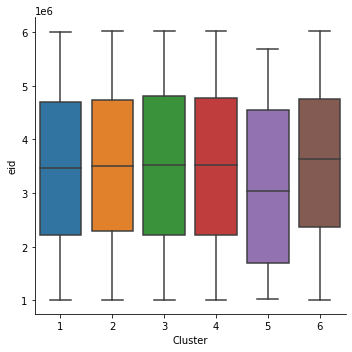

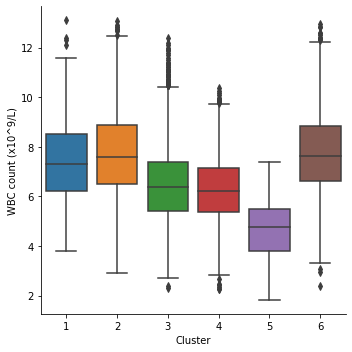

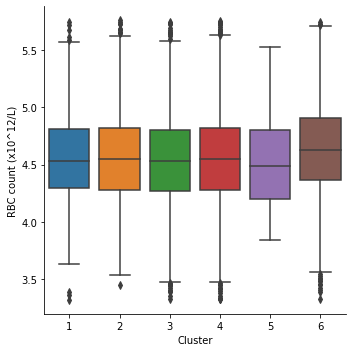

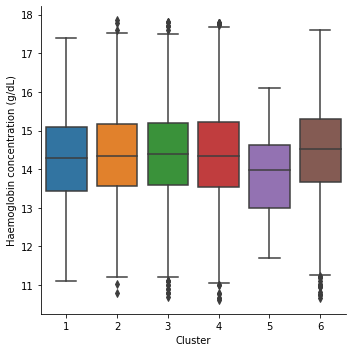

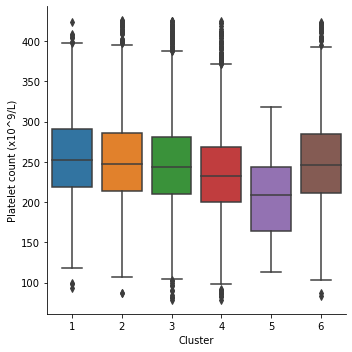

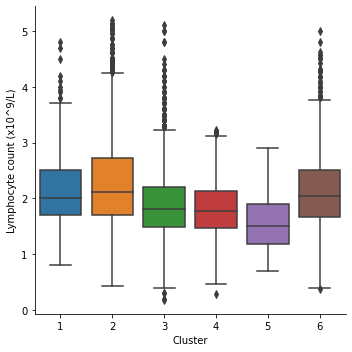

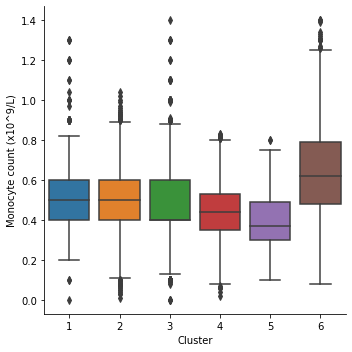

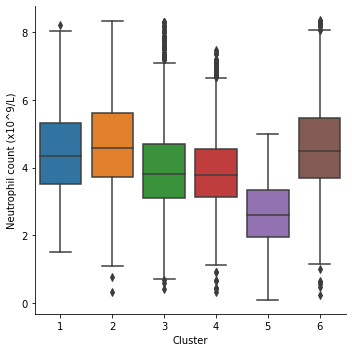

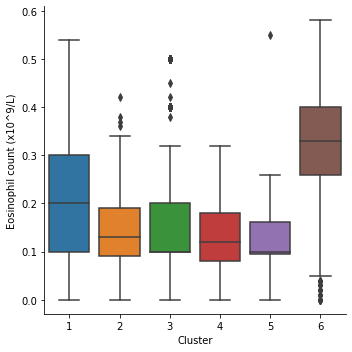

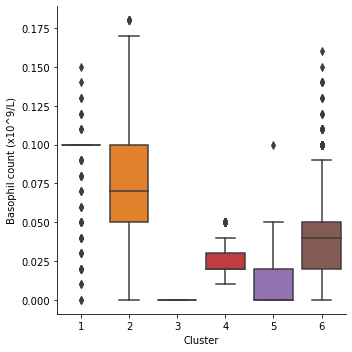

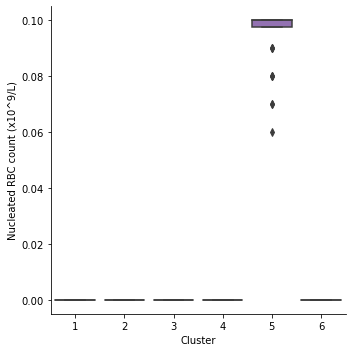

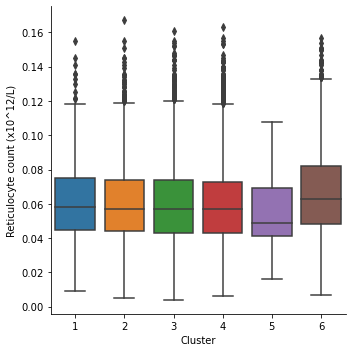

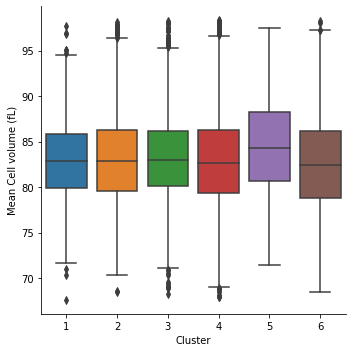

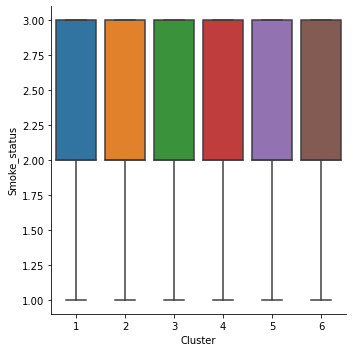

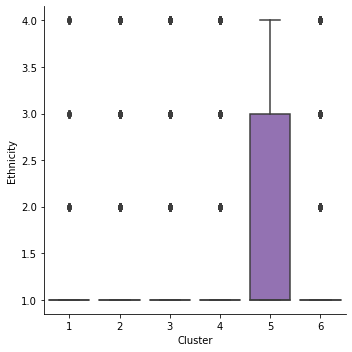

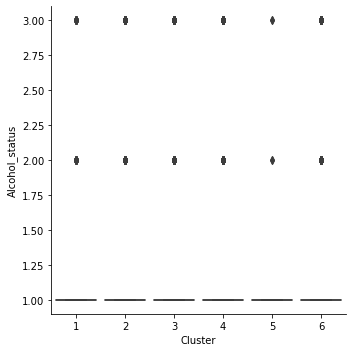

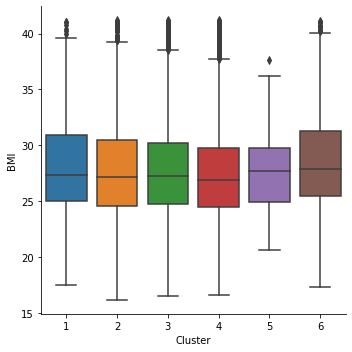

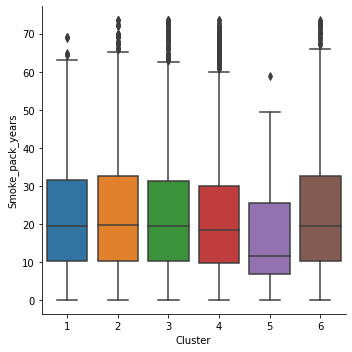

In [21]:
var_names = ['eid', 'WBC count (x10^9/L)', 'RBC count (x10^12/L)', 'Haemoglobin concentration (g/dL)',
       'Platelet count (x10^9/L)', 'Lymphocyte count (x10^9/L)', 'Monocyte count (x10^9/L)',
       'Neutrophil count (x10^9/L)', 'Eosinophil count (x10^9/L)', 'Basophil count (x10^9/L)',
       'Nucleated RBC count (x10^9/L)', 'Reticulocyte count (x10^12/L)', 'Mean Cell volume (fL)',
       'Smoke_status', 'Ethnicity', 'Alcohol_status', 'BMI',
       'Smoke_pack_years', 'time_to_diagnosis', 'Sex', 'deprivation_score',
       'Age_recr', 'case_status', 'year_diagnosis', 'days_since_diagnosis']

# loop over variables and create a boxplot for each one
for var_name in var_names:
    # create a facet grid of boxplots for each cluster
    sb.catplot(data=training_plots, x='Cluster', y=var_name, kind='box')

In [ ]:
# get the number of observations in each cluster
cluster_counts = training_plots['Cluster'].value_counts()

# loop over variables and create a boxplot for each one
for var_name in var_names:
    # create a facet grid of boxplots for each cluster
    g = sb.catplot(data=training_plots, x='Cluster', y=var_name, kind='box')
    
    # add text with cluster counts below the x-axis
    ax = g.ax
    for i, count in enumerate(cluster_counts):
        ax.text(i, -0.5, f'n={count}', ha='center', fontsize=)

# Is there a significant difference between the clusters for each of the variables? - ANOVA

In [22]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Group data by cluster
cluster_groups = training_plots.groupby("Cluster")
# Create an empty DataFrame to store ANOVA and Tukey results
anova_results = pd.DataFrame(columns=["Variable", "F-statistic", "p-value"])
tukey_results = pd.DataFrame(columns=["Variable", "Cluster1", "Cluster2", "Difference", "Lower CI", "Upper CI", "p-value"])
# Loop through each variable and perform ANOVA
for var in ['WBC count (x10^9/L)','RBC count (x10^12/L)', 'Haemoglobin concentration (g/dL)', 'Platelet count (x10^9/L)',
            'Lymphocyte count (x10^9/L)', 'Monocyte count (x10^9/L)', 'Neutrophil count (x10^9/L)',
            'Eosinophil count (x10^9/L)', 'Basophil count (x10^9/L)', 'Nucleated RBC count (x10^9/L)',
            'Reticulocyte count (x10^12/L)', 'Mean Cell volume (fL)']:
    
    # Get the values for each cluster
    cluster_data = [group[var].values for name, group in cluster_groups]

    # Perform ANOVA
    f_stat, p_value = f_oneway(*cluster_data)
     # Store ANOVA results in the DataFrame
    anova_results = anova_results.append({"Variable": var, "F-statistic": f_stat, "p-value": p_value}, ignore_index=True)
    tukey = pairwise_tukeyhsd(training_plots[var], training_plots['Cluster'], alpha=0.05)
    for i in range(len(tukey._results_table)):
        tukey_results = tukey_results.append({"Variable": var, 
                                              "Cluster1": tukey._results_table[i][0], 
                                              "Cluster2": tukey._results_table[i][1], 
                                              "Difference": tukey._results_table[i][2], 
                                              "Lower CI": tukey._results_table[i][3], 
                                              "Upper CI": tukey._results_table[i][4], 
                                              "p-value": tukey._results_table[i][5]}, 
                                             ignore_index=True)
        #adjust p-values
        anova_results["Bonferroni p-value"] = anova_results["p-value"] * len(cluster_data)
  

/var/tmp/pbs.7287748.pbs/ipykernel_2806693/4079795343.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({"Variable": var, "F-statistic": f_stat, "p-value": p_value}, ignore_index=True)
/var/tmp/pbs.7287748.pbs/ipykernel_2806693/4079795343.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tukey_results = tukey_results.append({"Variable": var,
/var/tmp/pbs.7287748.pbs/ipykernel_2806693/4079795343.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tukey_results = tukey_results.append({"Variable": var,
/var/tmp/pbs.7287748.pbs/ipykernel_2806693/4079795343.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [23]:
anova_results

,Variable,F-statistic,p-value,Bonferroni p-value
0,WBC count (x10^9/L),565.729264,0.000000e+00,0.000000e+00
1,RBC count (x10^12/L),13.103771,9.313010e-13,5.587806e-12
2,Haemoglobin concentration (g/dL),5.448255,5.167994e-05,3.100796e-04
3,Platelet count (x10^9/L),56.902533,7.510545e-59,4.506327e-58
4,Lymphocyte count (x10^9/L),266.813211,1.322223e-274,7.933337e-274
5,Monocyte count (x10^9/L),501.498233,0.000000e+00,0.000000e+00
6,Neutrophil count (x10^9/L),277.086670,7.690093e-285,4.614056e-284
7,Eosinophil count (x10^9/L),1454.603567,0.000000e+00,0.000000e+00
8,Basophil count (x10^9/L),7811.865769,0.000000e+00,0.000000e+00
9,Nucleated RBC count (x10^9/L),257360.002759,0.000000e+00,0.000000e+00


In [24]:
anova_results['Adjusted p-value'] = anova_results['p-value'] *11

In [25]:
anova_results

,Variable,F-statistic,p-value,Bonferroni p-value,Adjusted p-value
0,RBC count (x10^12/L),13.103771,9.313010e-13,5.587806e-12,1.024431e-11
1,Haemoglobin concentration (g/dL),5.448255,5.167994e-05,3.100796e-04,5.684793e-04
2,Platelet count (x10^9/L),56.902533,7.510545e-59,4.506327e-58,8.261599e-58
3,Lymphocyte count (x10^9/L),266.813211,1.322223e-274,7.933337e-274,1.454445e-273
4,Monocyte count (x10^9/L),501.498233,0.000000e+00,0.000000e+00,0.000000e+00
5,Neutrophil count (x10^9/L),277.086670,7.690093e-285,4.614056e-284,8.459102e-284
6,Eosinophil count (x10^9/L),1454.603567,0.000000e+00,0.000000e+00,0.000000e+00
7,Basophil count (x10^9/L),7811.865769,0.000000e+00,0.000000e+00,0.000000e+00
8,Nucleated RBC count (x10^9/L),257360.002759,0.000000e+00,0.000000e+00,0.000000e+00
9,Reticulocyte count (x10^12/L),27.122238,2.028876e-27,1.217326e-26,2.231764e-26


In [36]:
anova_results

,Variable,F-statistic,p-value,Bonferroni p-value
0,RBC count (x10^12/L),13.103771,9.313010e-13,5.587806e-12
1,Haemoglobin concentration (g/dL),5.448255,5.167994e-05,3.100796e-04
2,Platelet count (x10^9/L),56.902533,7.510545e-59,4.506327e-58
3,Lymphocyte count (x10^9/L),266.813211,1.322223e-274,7.933337e-274
4,Monocyte count (x10^9/L),501.498233,0.000000e+00,0.000000e+00
5,Neutrophil count (x10^9/L),277.086670,7.690093e-285,4.614056e-284
6,Eosinophil count (x10^9/L),1454.603567,0.000000e+00,0.000000e+00
7,Basophil count (x10^9/L),7811.865769,0.000000e+00,0.000000e+00
8,Nucleated RBC count (x10^9/L),257360.002759,0.000000e+00,0.000000e+00
9,Reticulocyte count (x10^12/L),27.122238,2.028876e-27,1.217326e-26


In [24]:
pd.set_option('display.max_rows',None)

tukey_results

,Variable,Cluster1,Cluster2,Difference,Lower CI,Upper CI,p-value
0,WBC count (x10^9/L),group1,group2,meandiff,p-adj,lower,upper
1,WBC count (x10^9/L),1,2,0.3204,0.0001,0.122,0.5187
2,WBC count (x10^9/L),1,3,-0.8721,0.0,-1.0624,-0.6818
3,WBC count (x10^9/L),1,4,-1.1036,0.0,-1.2912,-0.916
4,WBC count (x10^9/L),1,5,-2.6126,0.0,-3.3362,-1.889
5,WBC count (x10^9/L),1,6,0.3768,0.0,0.173,0.5806
6,WBC count (x10^9/L),2,3,-1.1925,0.0,-1.2973,-1.0877
7,WBC count (x10^9/L),2,4,-1.424,0.0,-1.5239,-1.3241
8,WBC count (x10^9/L),2,5,-2.933,0.0,-3.6389,-2.227
9,WBC count (x10^9/L),2,6,0.0564,0.8072,-0.0713,0.1842


# Create heatmap of tukey results

In [27]:
tukey_results2 = tukey_results.drop(labels=[0,16,32,48,64,80,96,112,128,144,160],axis=0)

In [62]:
tukey_results

,Variable,Cluster1,Cluster2,Difference,Lower CI,Upper CI,p-value
0,RBC count (x10^12/L),group1,group2,meandiff,p-adj,lower,upper
1,RBC count (x10^12/L),1,2,0.0059,0.9996,-0.0467,0.0585
2,RBC count (x10^12/L),1,3,-0.0133,0.9757,-0.0637,0.0372
3,RBC count (x10^12/L),1,4,-0.0028,1.0,-0.0525,0.047
4,RBC count (x10^12/L),1,5,-0.0123,1.0,-0.2042,0.1795
5,RBC count (x10^12/L),1,6,0.0703,0.0029,0.0162,0.1243
6,RBC count (x10^12/L),2,3,-0.0191,0.3637,-0.0469,0.0086
7,RBC count (x10^12/L),2,4,-0.0086,0.9386,-0.0351,0.0178
8,RBC count (x10^12/L),2,5,-0.0182,0.9998,-0.2054,0.1689
9,RBC count (x10^12/L),2,6,0.0644,0.0,0.0305,0.0982


In [63]:
# Split the dataframe into a list of dataframes
dfs = [tukey_results[i:i+16] for i in range(0, len(tukey_results), 16)]

In [66]:
dfs[0] = dfs

,Variable,Cluster1,Cluster2,Difference,Lower CI,Upper CI,p-value
0,RBC count (x10^12/L),group1,group2,meandiff,p-adj,lower,upper
1,RBC count (x10^12/L),1,2,0.0059,0.9996,-0.0467,0.0585
2,RBC count (x10^12/L),1,3,-0.0133,0.9757,-0.0637,0.0372
3,RBC count (x10^12/L),1,4,-0.0028,1.0,-0.0525,0.047
4,RBC count (x10^12/L),1,5,-0.0123,1.0,-0.2042,0.1795
5,RBC count (x10^12/L),1,6,0.0703,0.0029,0.0162,0.1243
6,RBC count (x10^12/L),2,3,-0.0191,0.3637,-0.0469,0.0086
7,RBC count (x10^12/L),2,4,-0.0086,0.9386,-0.0351,0.0178
8,RBC count (x10^12/L),2,5,-0.0182,0.9998,-0.2054,0.1689
9,RBC count (x10^12/L),2,6,0.0644,0.0,0.0305,0.0982


In [67]:
for i in range(len(dfs)):
    dfs[i] = dfs[i][["Variable", "Cluster1", "Cluster2", "Lower CI"]]

In [32]:
tukey_heatmap = tukey_results2[['Variable','Cluster1','Cluster2','Lower CI']]

In [61]:
tukey_heatmap.columns

Index(['Variable', 'Cluster1', 'Cluster2', 'Lower CI'], dtype='object')

In [ ]:
tukey_heatmap